In [1]:
# Numpy module
import numpy as np
# Matplotlib module
import matplotlib.pyplot as plt
# Scipy module
from scipy.signal import square, butter, sosfilt
# Inline matplotlib
%matplotlib inline

In [15]:
# Total time [s]
t_tot = 3
# Time resolution [points/s]
resolution = 10e6
# Total number of points
N_tot = int(t_tot*resolution)
# Time array
t = np.linspace(0, t_tot, N_tot)
# Lock-in frequency [Hz]
f_lock_in = 10
# Lock-in reference amplitude [V]
V_amp_lock_in = 1e-3
# Lock-in reference signal [V] 
V_lock_in = np.where(np.cos(2*np.pi*f_lock_in*t)>=0, V_amp_lock_in, -V_amp_lock_in)
V_lock_in_sin = np.where(np.sin(2*np.pi*f_lock_in*t)>=0, V_amp_lock_in, -V_amp_lock_in)
# Reset frequency [Hz]
f_reset = 0.1e6 
# Rabi frequency [Hz]
f_rabi = 1e6

# Minimal conductance [Si]
sigma_min = 1e-6
# Conductance variation [Si]
sigma_amplitude = 1e-7 
# Pulse time [s]
t_pulse = 5e-7


# Conductance [Si]
sigma = np.where(np.cos(2*np.pi*f_lock_in*t)>=0,sigma_min + sigma_amplitude*(np.where(square(2*np.pi*f_reset*(t-1e-6), duty=t_pulse*f_reset)>0, np.cos(2*np.pi*f_rabi*(t-1e6) - np.pi), -1)+1)/2, sigma_min)
# Current after DUT [A]
iDUT = V_lock_in*sigma
# TiA coefficient [V/A]
TiA_coeff = 1e-3/1e-9
# Voliage in Lock-in [V]
V_in = iDUT*TiA_coeff


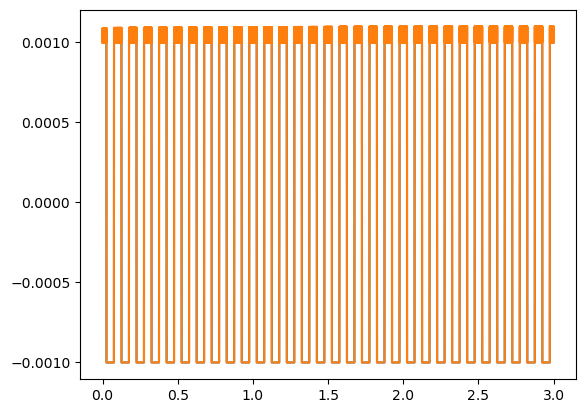

In [16]:
plt.plot(t, V_lock_in)
plt.plot(t,V_in)
#plt.plot(t, square(2*np.pi*f_reset*(t-1e-6), duty=0.2))
#plt.xlim([0,5e-5])
plt.show()
plt.close("all")

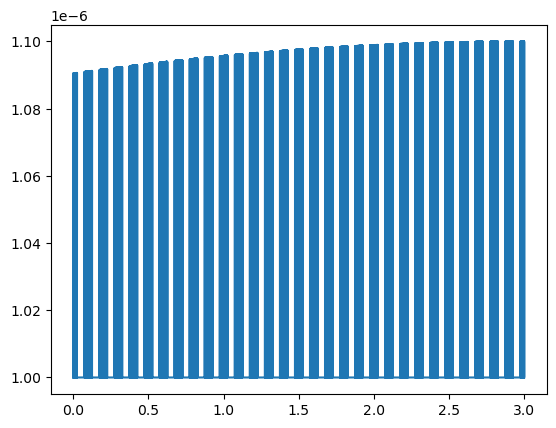

In [17]:
plt.plot(t, np.multiply(V_lock_in,V_in))
plt.show()
plt.close("all")

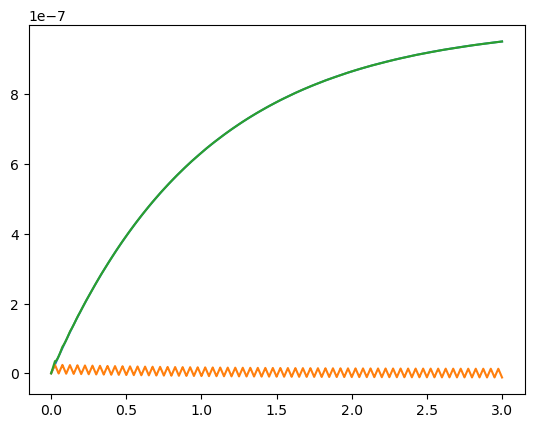

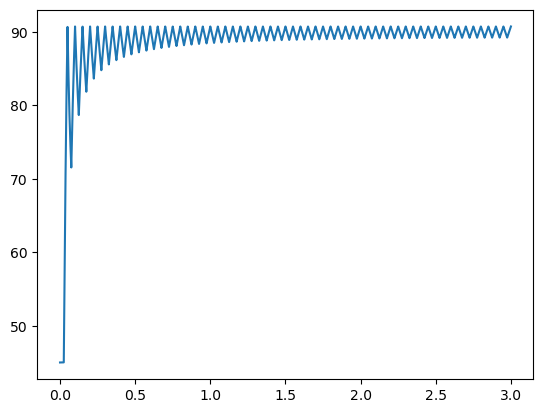

In [19]:
RC = 1.0 # [s]
f_cut_off = 1.0/(2.0*np.pi*RC)
sos1 = butter(1, f_cut_off, "low", output="sos", fs = 1/(t[1]-t[0]))
X = sosfilt(sos1, np.multiply(V_lock_in,V_in))
Y = sosfilt(sos1, np.multiply(V_lock_in_sin,V_in))

plt.plot(t,X)
plt.plot(t,Y)
plt.plot(t,np.sqrt(X**2 + Y**2))
plt.show()
plt.close("all")

plt.plot(t,180*np.arctan2(X,Y)/np.pi)
plt.show()
plt.close("all")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


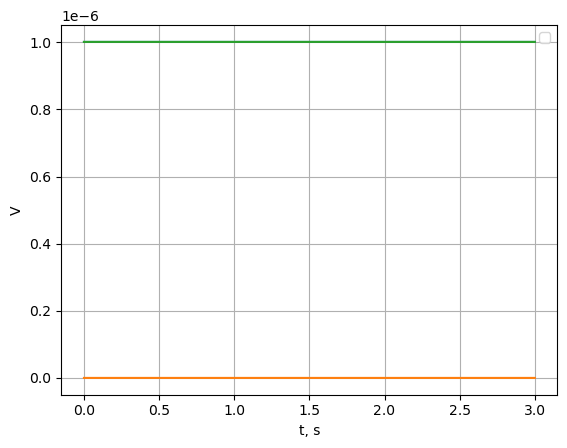

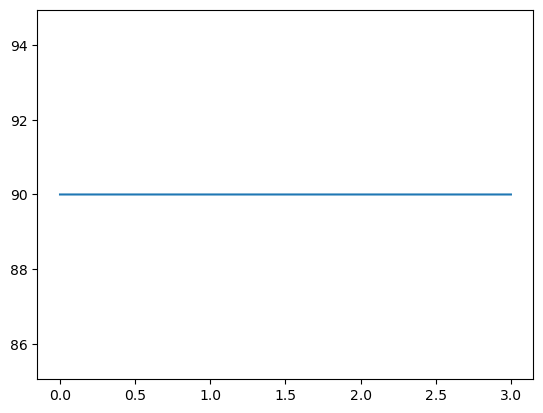

In [22]:
X_avg = np.array([np.mean(np.multiply(V_lock_in,V_in)).tolist()] * len(t))
Y_avg = np.array([np.mean(np.multiply(V_lock_in_sin,V_in)).tolist()] * len(t))

plt.plot(t,X_avg)
plt.plot(t,Y_avg)
plt.plot(t,np.sqrt(X_avg**2+ Y_avg**2))
plt.legend()
plt.grid()
plt.xlabel("t, s")
plt.ylabel("V")
plt.show()
plt.close("all")

plt.plot(t,180/np.pi*np.arctan2(X_avg,Y_avg))
plt.show()
plt.close("all")